In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## EDA

### pairplot

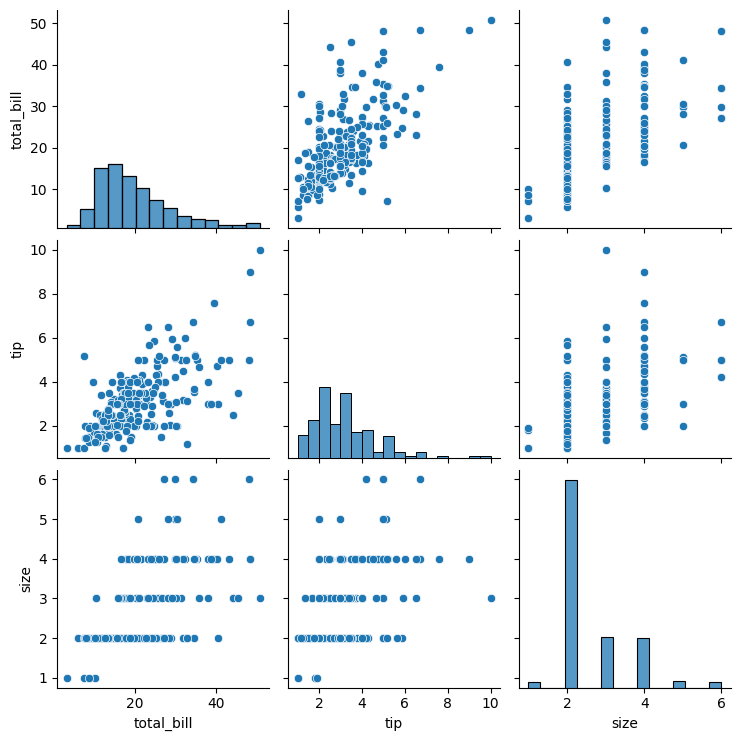

In [7]:
sns.pairplot(df)
plt.show()

### scatter plot

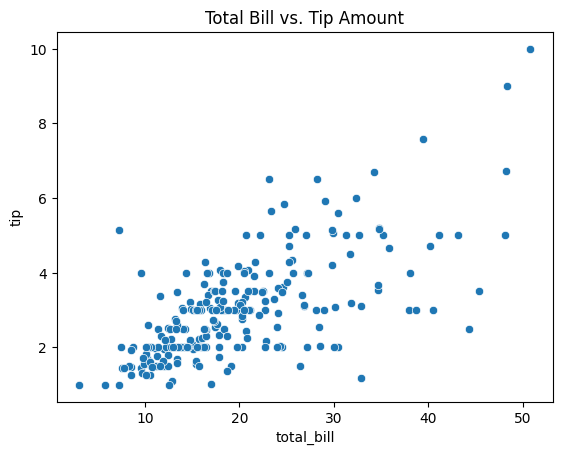

In [9]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs. Tip Amount")
plt.show()

### Performing one hot encoding


In [11]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


### correlational matrix

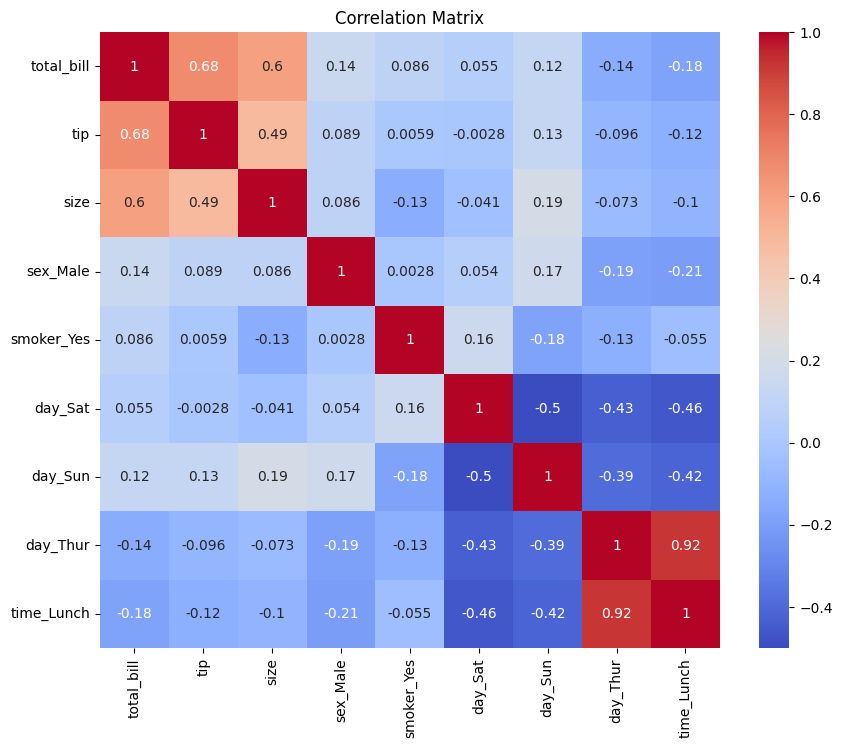

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### rainbow test

In [15]:
X = df[['total_bill', 'size']]  # Replace with relevant predictors
y = df['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected (p < 0.05), consider non-linear models.")
else:
    print("Data appears linear (p >= 0.05).")


Rainbow test p-value: 0.17048935693447642
Data appears linear (p >= 0.05).


### residual plot

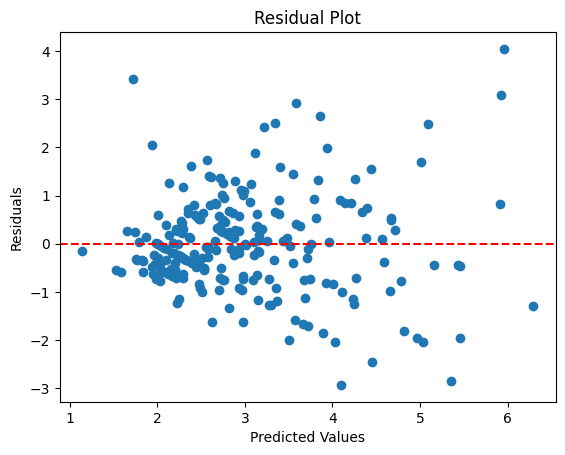

In [17]:
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### line plot

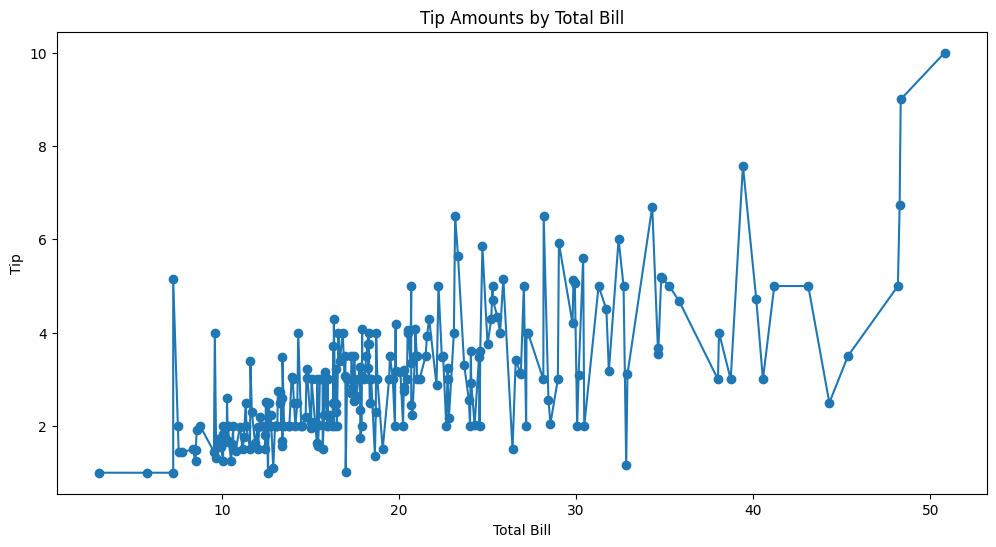

In [19]:


sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

## using regression 

In [21]:
X = df.drop("tip", axis=1)
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.43730181943482505, Accuracy Score: 0.40816326530612246
Ridge Regression - R2 Score: 0.4393889716178486, Accuracy Score: 0.40816326530612246
Lasso Regression - R2 Score: 0.5273068720881755, Accuracy Score: 0.40816326530612246
Decision Tree Regression - R2 Score: -0.004178121600921791, Accuracy Score: 0.42857142857142855
Random Forest Regression - R2 Score: 0.2642455218065466, Accuracy Score: 0.3877551020408163
Support Vector Regression - R2 Score: 0.032004924105307975, Accuracy Score: 0.32653061224489793
K-Nearest Neighbors Regression - R2 Score: 0.29888587066985495, Accuracy Score: 0.3877551020408163
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.437302        0.408163
1                Ridge Regression  0.439389        0.408163
2                Lasso Regression  0.527307        0.408163
3        Decision Tree Regression -0.004178        0.428571
4        Random Forest Regression  0.264246        0.387755
